## Project 1 Nico Kaiser

## 1. Load Libraries




In [1]:
# Load libraries and define plot format

%tensorflow_version 2.x

import sys
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
import tensorflow.compat.v1 as tf
import tensorflow.keras.datasets.mnist as mnist
tf.disable_v2_behavior()

# Plot formatting
%matplotlib inline
plt.style.use('ggplot')

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")

Instructions for updating:
non-resource variables are not supported in the long term


## 2. Load Data

In [2]:
# import data
from google.colab import files
uploaded = files.upload()

Saving spambase.csv to spambase.csv
Saving spambase.data to spambase.data
Saving spambase.DOCUMENTATION to spambase.DOCUMENTATION
Saving spambase.names to spambase.names


In [3]:
column_names = ["word_freq_make","word_freq_address1", "word_freq_all2", "word_freq_3d3", "word_freq_our4", "word_freq_over5", "word_freq_remove6", "word_freq_internet7", "word_freq_order8", "word_freq_mail9", "word_freq_receive10", "word_freq_will11",
                                                      "word_freq_people12", "word_freq_report13", "word_freq_addresses14", "word_freq_free15", "word_freq_business16", "word_freq_email17", "word_freq_you18", "word_freq_credit19", "word_freq_your20", "word_freq_font21", "word_freq_00022",
                                                      "word_freq_money23", "word_freq_hp24", "word_freq_hpl25", "word_freq_george26", "word_freq_65027", "word_freq_lab28", "word_freq_labs29", "word_freq_telnet30", "word_freq_85731", "word_freq_data32", "word_freq_41533", "word_freq_8534", "word_freq_technology35"
                                                      , "word_freq_199936", "word_freq_parts37", "word_freq_pm38", "word_freq_direct39", "word_freq_cs40", "word_freq_meeting41", "word_freq_original42", "word_freq_project43", "word_freq_re44", "word_freq_edu45", "word_freq_table46",
                                                       "word_freq_conference47", "char_freq_;48", "char_freq_(49", "char_freq_[50", "char_freq_!51", "char_freq_$52", "char_freq_#53", "capital_run_length_average54", "capital_run_length_longest55", "capital_run_length_total56","spam_ham57"]

In [4]:
#load data into datafram in order to examine

df1 = pd.read_csv("spambase.csv", header=0, names=column_names)

In [5]:
df1.head(10)

,word_freq_make,word_freq_address1,word_freq_all2,word_freq_3d3,word_freq_our4,word_freq_over5,word_freq_remove6,word_freq_internet7,word_freq_order8,word_freq_mail9,word_freq_receive10,word_freq_will11,word_freq_people12,word_freq_report13,word_freq_addresses14,word_freq_free15,word_freq_business16,word_freq_email17,word_freq_you18,word_freq_credit19,word_freq_your20,word_freq_font21,word_freq_00022,word_freq_money23,word_freq_hp24,word_freq_hpl25,word_freq_george26,word_freq_65027,word_freq_lab28,word_freq_labs29,word_freq_telnet30,word_freq_85731,word_freq_data32,word_freq_41533,word_freq_8534,word_freq_technology35,word_freq_199936,word_freq_parts37,word_freq_pm38,word_freq_direct39,word_freq_cs40,word_freq_meeting41,word_freq_original42,word_freq_project43,word_freq_re44,word_freq_edu45,word_freq_table46,word_freq_conference47,char_freq_;48,char_freq_(49,char_freq_[50,char_freq_!51,char_freq_$52,char_freq_#53,capital_run_length_average54,capital_run_length_longest55,capital_run_length_total56,spam_ham57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.96,3.84,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


In [6]:
# read the dataset

x = []
y = []
with open("spambase.data", "rt") as csvfile:
	data = csv.reader(csvfile, delimiter=',')
	for raw in data:
		x.append(np.array(raw[:-1], dtype=np.float32))
		y.append(int(raw[-1]))
		
x = np.array(x)
y = np.array(y)
y = y.reshape((-1,1)).astype(np.float32)  # MV: reshape to 1-channel output

n_ch = x.shape[-1]

In [7]:
# normalize inputs
for ch in range(n_ch):
	#ch_v = x[:, ch]
	#norm = ch_v.max()
	#x[:, ch] /= norm
  x[:, ch] -= x[:, ch].mean()
  x[:, ch] /= x[:, ch].std()
print (x.shape, y.shape)


(4601, 57) (4601, 1)


In [8]:
input_names = ["word_freq_make0","word_freq_address1", "word_freq_all2", "word_freq_3d3", "word_freq_our4", "word_freq_over5", "word_freq_remove6", "word_freq_internet7", "word_freq_order8", "word_freq_mail9", "word_freq_receive10", "word_freq_will11",
                                                      "word_freq_people12", "word_freq_report13", "word_freq_addresses14", "word_freq_free15", "word_freq_business16", "word_freq_email17", "word_freq_you18", "word_freq_credit19", "word_freq_your20", "word_freq_font21", "word_freq_00022",
                                                      "word_freq_money23", "word_freq_hp24", "word_freq_hpl25", "word_freq_george26", "word_freq_65027", "word_freq_lab28", "word_freq_labs29", "word_freq_telnet30", "word_freq_85731", "word_freq_data32", "word_freq_41533", "word_freq_8534", "word_freq_technology35"
                                                      , "word_freq_199936", "word_freq_parts37", "word_freq_pm38", "word_freq_direct39", "word_freq_cs40", "word_freq_meeting41", "word_freq_original42", "word_freq_project43", "word_freq_re44", "word_freq_edu45", "word_freq_table46",
                                                       "word_freq_conference47", "char_freq_;48", "char_freq_(49", "char_freq_[50", "char_freq_!51", "char_freq_$52", "char_freq_#53", "capital_run_length_average54", "capital_run_length_longest55", "capital_run_length_total56"]

In [9]:
# read normalized data into dataframe in order to examine
df2 = pd.DataFrame(x, columns = input_names)

In [10]:
df2.head(10)

,word_freq_make0,word_freq_address1,word_freq_all2,word_freq_3d3,word_freq_our4,word_freq_over5,word_freq_remove6,word_freq_internet7,word_freq_order8,word_freq_mail9,word_freq_receive10,word_freq_will11,word_freq_people12,word_freq_report13,word_freq_addresses14,word_freq_free15,word_freq_business16,word_freq_email17,word_freq_you18,word_freq_credit19,word_freq_your20,word_freq_font21,word_freq_00022,word_freq_money23,word_freq_hp24,word_freq_hpl25,word_freq_george26,word_freq_65027,word_freq_lab28,word_freq_labs29,word_freq_telnet30,word_freq_85731,word_freq_data32,word_freq_41533,word_freq_8534,word_freq_technology35,word_freq_199936,word_freq_parts37,word_freq_pm38,word_freq_direct39,word_freq_cs40,word_freq_meeting41,word_freq_original42,word_freq_project43,word_freq_re44,word_freq_edu45,word_freq_table46,word_freq_conference47,char_freq_;48,char_freq_(49,char_freq_[50,char_freq_!51,char_freq_$52,char_freq_#53,capital_run_length_average54,capital_run_length_longest55,capital_run_length_total56
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435129,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,1.588784,-0.106431,0.086612,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605856,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605856,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014909,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
5,-0.342434,-0.165072,-0.556761,-0.0469,2.286862,-0.350266,-0.291794,4.350585,-0.323302,-0.371364,-0.296860,-0.628713,-0.312055,-0.174927,-0.190114,-0.301378,-0.321135,-0.347876,-0.936242,-0.167893,-0.674419,-0.118172,-0.290209,-0.2129

In [11]:
# append spam / ham info for examination
df2["spam_ham"]=df1["spam_ham57"]

In [12]:
df2.head(10)

,word_freq_make0,word_freq_address1,word_freq_all2,word_freq_3d3,word_freq_our4,word_freq_over5,word_freq_remove6,word_freq_internet7,word_freq_order8,word_freq_mail9,word_freq_receive10,word_freq_will11,word_freq_people12,word_freq_report13,word_freq_addresses14,word_freq_free15,word_freq_business16,word_freq_email17,word_freq_you18,word_freq_credit19,word_freq_your20,word_freq_font21,word_freq_00022,word_freq_money23,word_freq_hp24,word_freq_hpl25,word_freq_george26,word_freq_65027,word_freq_lab28,word_freq_labs29,word_freq_telnet30,word_freq_85731,word_freq_data32,word_freq_41533,word_freq_8534,word_freq_technology35,word_freq_199936,word_freq_parts37,word_freq_pm38,word_freq_direct39,word_freq_cs40,word_freq_meeting41,word_freq_original42,word_freq_project43,word_freq_re44,word_freq_edu45,word_freq_table46,word_freq_conference47,char_freq_;48,char_freq_(49,char_freq_[50,char_freq_!51,char_freq_$52,char_freq_#53,capital_run_length_average54,capital_run_length_longest55,capital_run_length_total56,spam_ham
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1.0
1,0.345359,0.051909,0.435129,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1.0
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,1.588784,-0.106431,0.086612,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1.0
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605856,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.0
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605856,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.174920,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014909,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1.0
5,-0.342434,-0.165072,-0.556761,-0.0469,2.286862,-0.350266,-0.291794,4.350585,-0.323302,-0.371364,-0.296860,-0.628713,-0.312055,-0.174927,-0.190114,-0.301378,-0.321135,-0.347876,-0.936242,-0.167893,-0.67441

In [133]:
# split data into training and test sets

n_all = x.shape[0]



# percentage for training
n_train = n_all * 95//100

# randomize indexes for training
index1 = np.random.permutation(n_all)
index = np.random.permutation(n_all)[index1]

index_train = index[0:n_train]
index_test = index[n_train:]

# assign test and train sets
x_train = x[index_train]
x_test = x[index_test]

y_train = y[index_train]
y_test = y[index_test]


In [14]:
y.shape

(4601, 1)

## 3. Set Up Neural Network

In [42]:
#helper function for neuron layer

def fully_connected_layer(x, n_output, name=None, activation=None):
    """Fully connected layer.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        TF Scope to apply
    activation : None, optional
        Non-linear activation function

    Returns
    -------
    h, W : tf.Tensor, tf.Tensor
        Output of the fully connected layer and the weight matrix
    """
    if len(x.get_shape()) != 2:
        x = flatten(x, reuse=None)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=None):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.initializers.he_uniform())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.initializers.constant(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W

In [130]:
# define input and output
n_input = x_train.shape[1]
n_output = 1

In [44]:
y_test.shape

(93, 1)

### 3.1 Single Layer Network, No Activation

In [131]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 1 layer: 57 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 1, 'L1')

    Y_prob = tf.nn.sigmoid(L1, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L1, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0003).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')


In [32]:
print(X)
print(Y)
print(loss)
print(L1)
print(Y_pred)
print(Correct)

Tensor("X:0", shape=(?, 57), dtype=float32)
Tensor("Y:0", shape=(?, 1), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)
Tensor("L1/h:0", shape=(?, 1), dtype=float32)
Tensor("Cast:0", shape=(?, 1), dtype=int32)
Tensor("CorrectY:0", shape=(?, 1), dtype=bool)


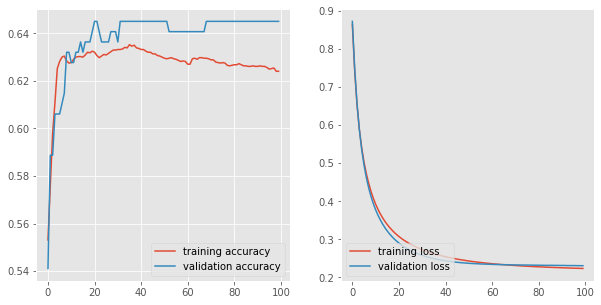

found label: [1] true label: [1.]


In [134]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [92]:
y_test.mean(), y_train.mean(), yprd.mean()

(0.2580645, 0.39685005, 0.25806451612903225)

In [93]:
corr.mean()

0.7419354838709677

Examine weights to see which inputs have biggest influence.

In [98]:
W1_res.shape

(57, 1)

In [99]:
df_weights1 = pd.DataFrame(data = W1_res, index = ["word_freq_make0","word_freq_address1", "word_freq_all2", "word_freq_3d3", "word_freq_our4", "word_freq_over5", "word_freq_remove6", "word_freq_internet7", "word_freq_order8", "word_freq_mail9", "word_freq_receive10", "word_freq_will11",
                                                      "word_freq_people12", "word_freq_report13", "word_freq_addresses14", "word_freq_free15", "word_freq_business16", "word_freq_email17", "word_freq_you18", "word_freq_credit19", "word_freq_your20", "word_freq_font21", "word_freq_00022",
                                                      "word_freq_money23", "word_freq_hp24", "word_freq_hpl25", "word_freq_george26", "word_freq_65027", "word_freq_lab28", "word_freq_labs29", "word_freq_telnet30", "word_freq_85731", "word_freq_data32", "word_freq_41533", "word_freq_8534", "word_freq_technology35"
                                                      , "word_freq_199936", "word_freq_parts37", "word_freq_pm38", "word_freq_direct39", "word_freq_cs40", "word_freq_meeting41", "word_freq_original42", "word_freq_project43", "word_freq_re44", "word_freq_edu45", "word_freq_table46",
                                                       "word_freq_conference47", "char_freq_;48", "char_freq_(49", "char_freq_[50", "char_freq_!51", "char_freq_$52", "char_freq_#53", "capital_run_length_average54", "capital_run_length_longest55", "capital_run_length_total56"])

In [100]:
df_weights1.head(58)

,0
word_freq_make0,-0.082952
word_freq_address1,-0.172799
word_freq_all2,0.088612
word_freq_3d3,0.465882
word_freq_our4,0.358485
word_freq_over5,0.159243
word_freq_remove6,0.964063
word_freq_internet7,0.267462
word_freq_order8,0.177992
word_freq_mail9,0.063102


In [101]:
df_weights1.sort_values(by = [0])

,0
word_freq_hp24,-1.443403
word_freq_george26,-0.919646
word_freq_edu45,-0.832150
word_freq_meeting41,-0.802676
word_freq_hpl25,-0.738442
word_freq_cs40,-0.685420
word_freq_project43,-0.668182
word_freq_re44,-0.616818
word_freq_conference47,-0.552407
word_freq_data32,-0.506161


In [64]:
# top 20 inputs with highest influence on result:

highest_influence = ["word_freq_3d3", "char_freq_$52", "word_freq_money23", "word_freq_remove6", 
                    "word_freq_business16", "word_freq_00022", "word_freq_email17", "word_freq_credit19", 
                    "char_freq_!51", "word_freq_85731", "word_freq_hpl25", "word_freq_george26", 
                    "word_freq_data32", "word_freq_pm38", "word_freq_telnet30", "word_freq_41533", 
                    "char_freq_(49", "word_freq_hp24", "word_freq_edu45", "word_freq_will11"]

### 3.2 Multilayer Network

In [135]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 3 layers: 57 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 20, 'L1', activation = tf.nn.relu)
    L2, W2 = fully_connected_layer(L1 , 10, 'L2')
    L3, W3 = fully_connected_layer(L2 , 10, 'L3')
    L4, W4 = fully_connected_layer(L2 , 5, 'L4')
    L5, W5 = fully_connected_layer(L3 , 1, 'L5')

    Y_prob = tf.nn.sigmoid(L5, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L5, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0003).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

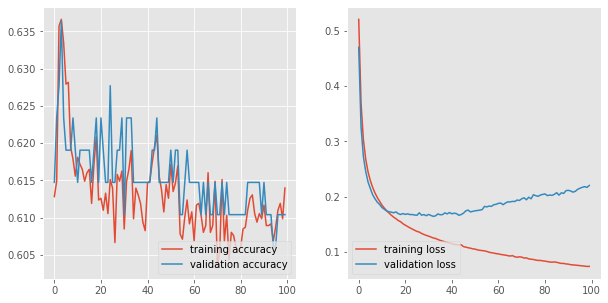

found label: [1] true label: [1.]


In [136]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [104]:
corr.mean()

0.5844155844155844

## 4. Define new inputs for better training results

Difference between single layer and mulilayer NN is negligible (accuracy around 60% for multitude of factors (different number of layers and neurons per layer, different activations, different learning rate and batch size and epoch number). 60% accuracy is reached almost instantly (after around 3-5 epochs).

Assumption is that there are many "noisy" factors that lead to a bad fit.

--> Only take top 20 influential inputs into network

In [105]:
#new dataset with only high influence parameters
df_highest_inf = df2[highest_influence].copy()

df_highest_inf.head(5)

,word_freq_3d3,char_freq_$52,word_freq_money23,word_freq_remove6,word_freq_business16,word_freq_00022,word_freq_email17,word_freq_credit19,char_freq_!51,word_freq_85731,word_freq_hpl25,word_freq_george26,word_freq_data32,word_freq_pm38,word_freq_telnet30,word_freq_41533,char_freq_(49,word_freq_hp24,word_freq_edu45,word_freq_will11
0,-0.0469,-0.308355,-0.212994,-0.291794,-0.321135,-0.290209,2.081207,-0.167893,0.624007,-0.143212,-0.29924,-0.227895,-0.17492,-0.180911,-0.160539,-0.145215,-0.514307,-0.328815,-0.197387,0.114087
1,-0.0469,0.423783,0.758565,0.244743,-0.163480,0.937491,0.179367,-0.167893,0.126203,-0.143212,-0.29924,-0.227895,-0.17492,-0.180911,-0.160539,-0.145215,-0.026007,-0.328815,-0.197387,0.288181
2,-0.0469,0.440053,-0.077428,0.193644,-0.186002,3.021726,1.591624,0.459913,0.008496,-0.143212,-0.29924,-0.227895,-0.17492,-0.180911,-0.160539,-0.145215,0.014684,-0.328815,-0.131527,-0.106431
3,-0.0469,-0.308355,-0.212994,0.500237,-0.321135,-0.290209,-0.347876,-0.167893,-0.161934,-0.143212,-0.29924,-0.227895,-0.17492,-0.180911,-0.160539,-0.145215,-0.007511,-0.328815,-0.197387,-0.268919
4,-0.0469,-0.308355,-0.212994,0.500237,-0.321135,-0.290209,-0.347876,-0.167893,-0.164387,-0.143212,-0.29924,-0.227895,-0.17492,-0.180911,-0.160539,-0.145215,-0.014909,-0.328815,-0.197387,-0.268919


In [106]:
#convert dataframe to numpy array

x_new = df_highest_inf.values

print(x_new)

[[-0.04689958 -0.30835494 -0.21299438 ... -0.32881472 -0.19738749
   0.11408725]
 [-0.04689958  0.4237831   0.7585651  ... -0.32881472 -0.19738749
   0.288181  ]
 [-0.04689958  0.4400528  -0.07742795 ... -0.32881472 -0.13152723
  -0.10643146]
 ...
 [-0.04689958 -0.30835494 -0.21299438 ... -0.32881472  1.1198174
   1.460412  ]
 [-0.04689958 -0.30835494 -0.21299438 ... -0.32881472  0.15386714
  -0.2573127 ]
 [-0.04689958 -0.30835494 -0.21299438 ... -0.32881472  0.51609844
  -0.6287126 ]]


In [137]:
#split data into training and test sets

# assign test and train sets
x_new_train = x_new[index_train]
x_new_test = x_new[index_test]

y_train = y[index_train]
y_test = y[index_test]

In [138]:
# define input and output
n_input = x_new_train.shape[1]
n_output = 1

## 4.1 Single Layer Network, No Activation

In [139]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 1 layer: 20 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 1, 'L1')

    Y_prob = tf.nn.sigmoid(L1, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L1, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0003).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

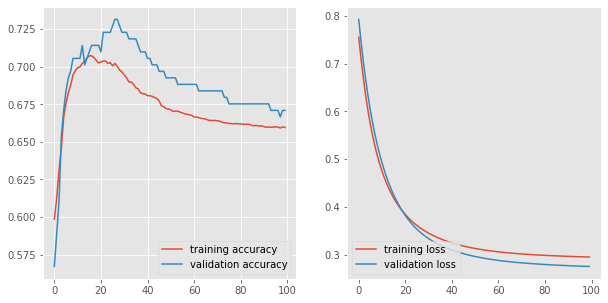

found label: [1] true label: [1.]


In [140]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_new_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_new_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_new_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_new_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_new_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_new_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_new_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [141]:
corr.mean()

0.670995670995671

## 4.2 Multilayer Network

In [142]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 3 layers: 20 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 20, 'L1')
    L2, W2 = fully_connected_layer(L1 , 10, 'L2')
    L3, W3 = fully_connected_layer(L2 , 10, 'L3')
    L4, W4 = fully_connected_layer(L3 , 1, 'L4')


    Y_prob = tf.nn.sigmoid(L4, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L4, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

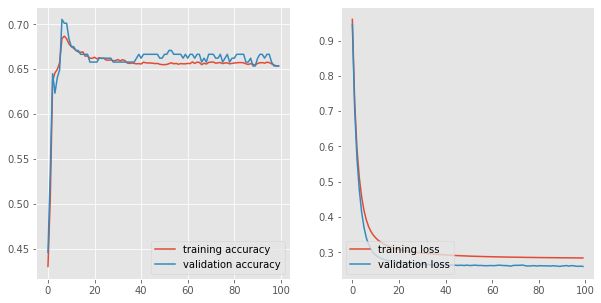

found label: [1] true label: [1.]


In [143]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_new_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_new_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_new_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_new_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_new_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_new_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_new_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [144]:
corr.mean()

0.6536796536796536

# 5 Try without most influential inputs

In [115]:
#create new list without 20 most influential inputs

low_influence = [x for x in input_names if x not in highest_influence]
print(len(low_influence))

37


In [116]:
#new dataframe without high influence parameters
df_low_influence = df2[low_influence].copy()

df_low_influence.head(5)

,word_freq_make0,word_freq_address1,word_freq_all2,word_freq_our4,word_freq_over5,word_freq_internet7,word_freq_order8,word_freq_mail9,word_freq_receive10,word_freq_people12,word_freq_report13,word_freq_addresses14,word_freq_free15,word_freq_you18,word_freq_your20,word_freq_font21,word_freq_65027,word_freq_lab28,word_freq_labs29,word_freq_8534,word_freq_technology35,word_freq_199936,word_freq_parts37,word_freq_direct39,word_freq_cs40,word_freq_meeting41,word_freq_original42,word_freq_project43,word_freq_re44,word_freq_table46,word_freq_conference47,char_freq_;48,char_freq_[50,char_freq_#53,capital_run_length_average54,capital_run_length_longest55,capital_run_length_total56
0,-0.342434,0.330885,0.712859,0.011565,-0.350266,-0.262562,-0.323302,-0.371364,-0.296860,-0.312055,-0.174927,-0.190114,0.086171,0.150905,0.125128,-0.118172,-0.23183,-0.166731,-0.22524,-0.198067,-0.24213,-0.323456,-0.059836,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.071388,-0.111546,-0.158453,-0.155198,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435129,-0.256117,0.672399,-0.088010,-0.323302,1.086711,0.745206,1.847391,0.451663,0.350812,-0.131825,1.018370,0.649831,-0.118172,-0.23183,-0.166731,-0.22524,-0.198067,-0.24213,-0.158129,-0.059836,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.071388,-0.111546,-0.158453,-0.155198,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,1.364846,0.343685,0.036670,1.974017,0.016422,1.588784,0.086612,-0.174927,6.571464,-0.228712,-0.170169,-0.249659,-0.118172,-0.23183,-0.166731,-0.22524,-0.198067,-0.24213,-0.323456,-0.059836,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.071388,-0.111546,-0.117376,-0.155198,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,0.472573,-0.350266,1.308402,0.789462,0.605856,1.241428,0.717835,-0.174927,-0.190114,0.074061,0.855017,-0.416232,-0.118172,-0.23183,-0.166731,-0.22524,-0.198067,-0.24213,-0.323456,-0.059836,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.071388,-0.111546,-0.158453,-0.155198,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,0.472573,-0.350266,1.308402,0.789462,0.605856,1.241428,0.717835,-0.174927,-0.190114,0.074061,0.855017,-0.416232,-0.118172,-0.23183,-0.166731,-0.22524,-0.198067,-0.24213,-0.323456,-0.059836,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.071388,-0.111546,-0.158453,-0.155198,-0.103048,-0.052150,-0.062466,-0.152222


In [117]:
#convert dataframe to numpy array

x_new2 = df_low_influence.values

print(x_new2)

[[-3.4243369e-01  3.3088493e-01  7.1285868e-01 ... -4.5247275e-02
   4.5297928e-02 -8.7241195e-03]
 [ 3.4535939e-01  5.1909201e-02  4.3512949e-01 ... -2.4432682e-03
   2.5056285e-01  1.2283241e+00]
 [-1.4592139e-01 -1.6507192e-01  8.5172331e-01 ...  1.4592087e-01
   2.2211061e+00  3.2587326e+00]
 ...
 [ 6.4012790e-01 -1.6507192e-01  3.8373481e-02 ... -1.1938206e-01
  -2.3694132e-01 -2.7262774e-01]
 [ 2.8017633e+00 -1.6507192e-01 -5.5676061e-01 ... -1.2748268e-01
  -2.4207294e-01 -3.3860365e-01]
 [-3.4243369e-01 -1.6507192e-01  7.3269647e-01 ... -1.2423612e-01
  -2.4207294e-01 -4.0128076e-01]]


In [145]:
#split data into training and test sets

# assign test and train sets
x_new2_train = x_new2[index_train]
x_new2_test = x_new2[index_test]

y_train = y[index_train]
y_test = y[index_test]

In [146]:
# define input and output
n_input = x_new2_train.shape[1]
n_output = 1

## 5.1 Single Layer Network, No Activation

In [147]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 1 layer: 37 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 1, 'L1')

    Y_prob = tf.nn.sigmoid(L1, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L1, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0003).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

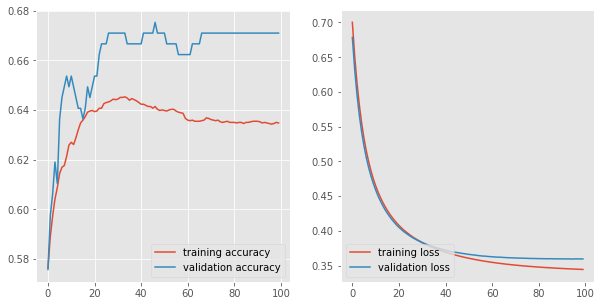

found label: [1] true label: [1.]


In [148]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_new2_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_new2_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_new2_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_new2_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_new2_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_new2_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_new2_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [149]:
corr.mean()

0.670995670995671

## 5.2 Multilayer Network

In [150]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])

    # 3 layers: 20 inputs -> 1 output
    L1, W1 = fully_connected_layer(X , 20, 'L1')
    L2, W2 = fully_connected_layer(L1 , 10, 'L2')
    L3, W3 = fully_connected_layer(L2 , 10, 'L3')
    L4, W4 = fully_connected_layer(L3 , 1, 'L4')


    Y_prob = tf.nn.sigmoid(L4, name='Prob')  

    # prediction
    Y_pred = tf.cast(Y_prob+0.5, dtype=tf.int32)   

    # loss function to optimize
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=L4, labels=Y,)

    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)  

    # get fraction of correctly assigned labels
    Y_true = Y[0]
    Correct = tf.equal(tf.cast(Y_true, dtype=tf.int32), Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

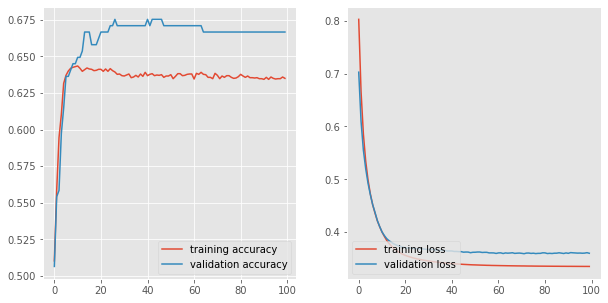

found label: [1] true label: [1.]


In [151]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []

    loss_val=[]
    loss_trn=[]
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 32
    n_epochs = 100

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            x_batch, y_batch = x_new2_train[sub_idx], y_train[sub_idx]

            sess.run(optimizer, feed_dict={
                X: x_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: x_new2_test,
                             Y: y_test
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: x_new2_train,
                             Y: y_train
                             })
        ll_v = sess.run(loss,
                         feed_dict={
                             X: x_new2_test,
                             Y: y_test
                             })
        ll_t = sess.run(loss,
                         feed_dict={
                             X: x_new2_train,
                             Y: y_train
                             })
        #print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)
        loss_val.append(ll_v)
        loss_trn.append(ll_t)

    # final test accuracy:
    corr, accr, yprd, yprb = sess.run((Correct, Accuracy, Y_pred, Y_prob),
                          feed_dict={
                              X: x_new2_test,
                              Y: y_test
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0] if len(wrong_idx) else 0
    wrong0_lbl = sess.run(Y_pred,
                   feed_dict={
                       X: x_new2_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test[wrong_idx0:wrong_idx0+1]
                   })[0]
    
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[1].plot(loss_trn)
    axs[1].plot(loss_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].legend(("training loss", "validation loss"), loc="lower left")
    #axs[1].imshow(x_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [152]:
corr.mean()

0.6666666666666666